In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data=pd.read_csv("spam.csv", encoding='latin1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [4]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [5]:
data.shape

(5572, 2)

In [6]:
data.dtypes

v1    object
v2    object
dtype: object

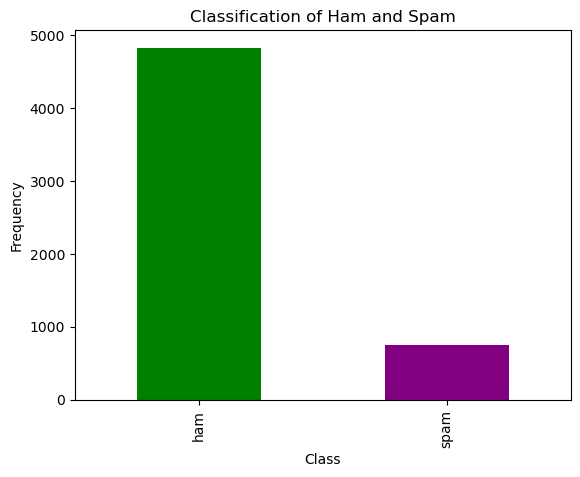

In [7]:
d1 = pd.value_counts(data["v1"])
d1.plot(kind="bar", color=["green", "purple"])
plt.title("Classification of Ham and Spam")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [8]:
data.replace(["ham","spam"],[0,1],inplace=True)

In [9]:
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
data['v1'].value_counts()

0    4825
1     747
Name: v1, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [12]:
data.describe()

,v1
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [13]:
data["v2"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

C:\Users\SWATHY KRISHNA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


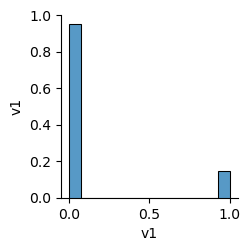

In [14]:
sns.pairplot(data)
plt.show()

In [15]:
data["v2"]=data["v2"].apply(len)
data["v2"].head()

0    111
1     29
2    155
3     49
4     61
Name: v2, dtype: int64

In [16]:
data["v2"] = data["v2"].astype(str)
words = data["v2"].str.split().sum()
word_counts = Counter(words)
most_common_words = word_counts.most_common(10)
print(most_common_words)

[('22', 123), ('24', 100), ('32', 96), ('23', 94), ('26', 87), ('28', 84), ('38', 84), ('29', 82), ('25', 82), ('30', 79)]


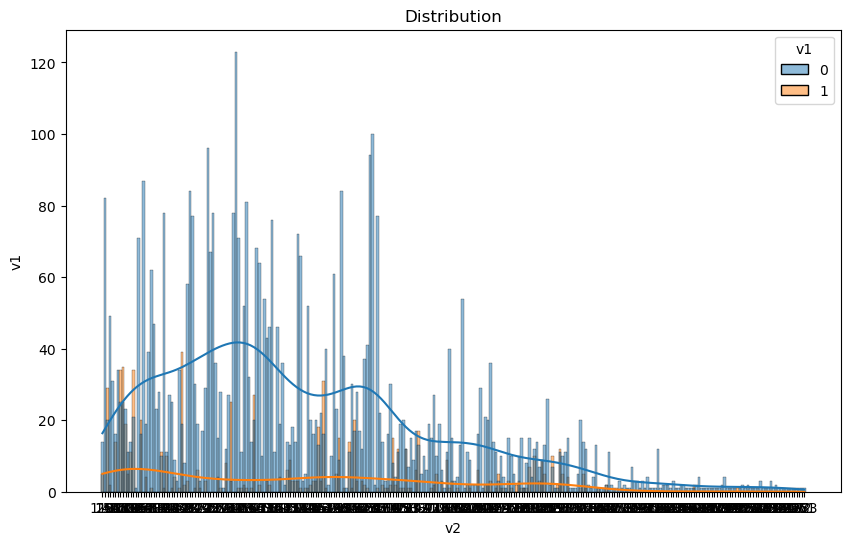

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x="v2",hue="v1",kde=True)
plt.title("Distribution")
plt.xlabel("v2")
plt.ylabel("v1")
plt.show()

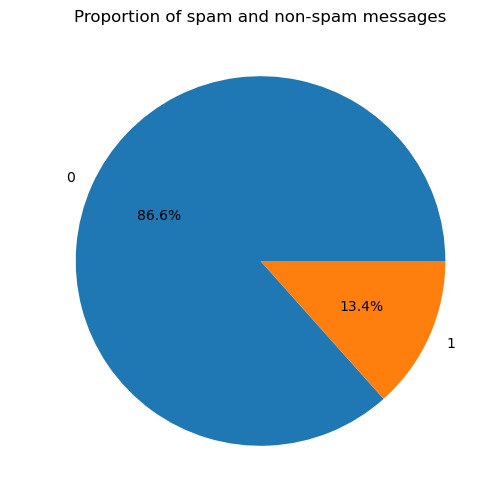

In [18]:
plt.figure(figsize=(10,6))
data["v1"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.title("Proportion of spam and non-spam messages")
plt.ylabel(" ")
plt.show()

In [19]:
data["v2"] = data["v2"].astype(str)
words = data["v2"].str.split().sum()

In [20]:
word_counts = Counter(words)
most_common_words = word_counts.most_common(10)
print("Most common words:", most_common_words)

Most common words: [('22', 123), ('24', 100), ('32', 96), ('23', 94), ('26', 87), ('28', 84), ('38', 84), ('29', 82), ('25', 82), ('30', 79)]


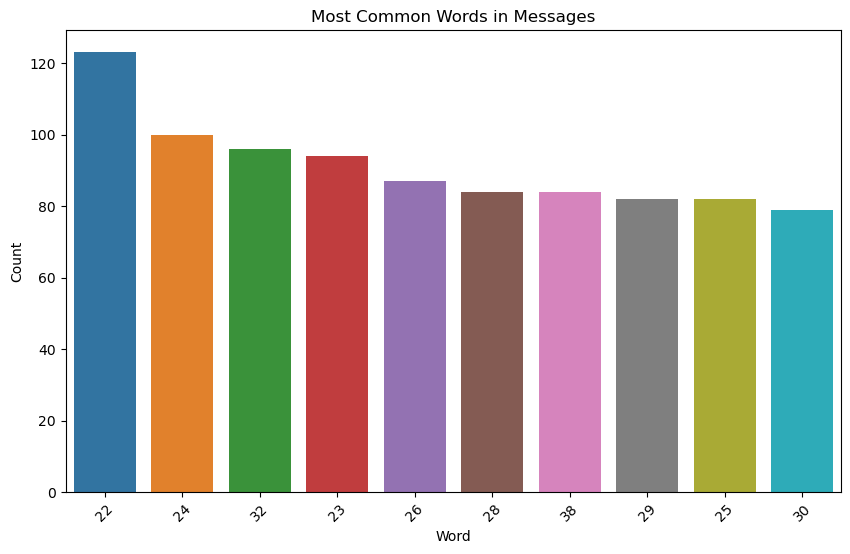

In [21]:
most_common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=most_common_words_df)
plt.title("Most Common Words in Messages")
plt.xlabel("Word")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [22]:
x = data["v2"]
y = data["v1"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
vectorizer = TfidfVectorizer(max_features=3000)
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

In [24]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [25]:
lr = LogisticRegression()
lr.fit(x_train_tfidf, y_train)
print("Logistic Regression Evaluation:")
evaluate_model(lr, x_test_tfidf, y_test)

Logistic Regression Evaluation:
[[929  36]
 [ 99  51]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       965
           1       0.59      0.34      0.43       150

    accuracy                           0.88      1115
   macro avg       0.74      0.65      0.68      1115
weighted avg       0.86      0.88      0.86      1115



In [26]:
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)
print("Naive Bayes Evaluation:")
evaluate_model(nb, x_test_tfidf, y_test)

Naive Bayes Evaluation:
[[918  47]
 [101  49]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       965
           1       0.51      0.33      0.40       150

    accuracy                           0.87      1115
   macro avg       0.71      0.64      0.66      1115
weighted avg       0.85      0.87      0.85      1115



In [27]:
svm = SVC()
svm.fit(x_train_tfidf, y_train)
print("Support Vector Machine Evaluation:")
evaluate_model(svm, x_test_tfidf, y_test)

Support Vector Machine Evaluation:
[[899  66]
 [ 74  76]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       965
           1       0.54      0.51      0.52       150

    accuracy                           0.87      1115
   macro avg       0.73      0.72      0.72      1115
weighted avg       0.87      0.87      0.87      1115



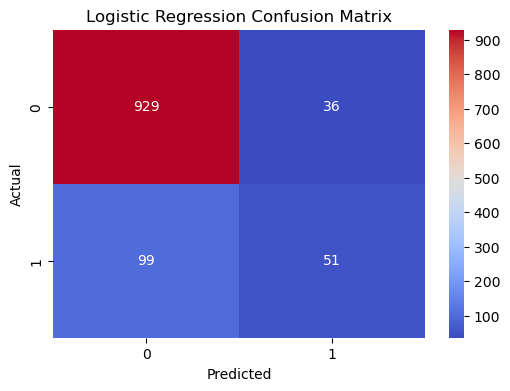

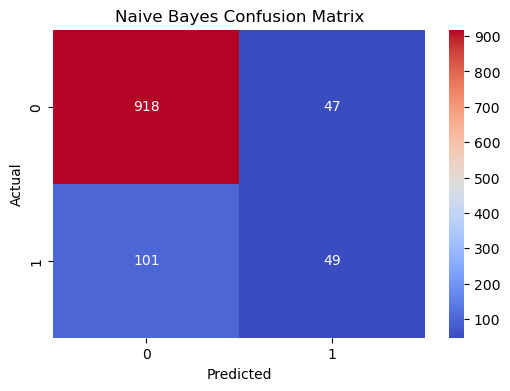

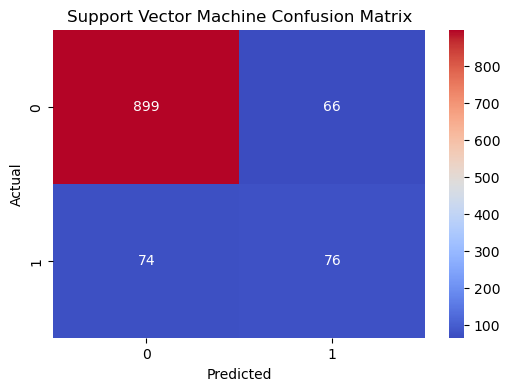

In [28]:
def plot_confusion_matrix(model, x_test, y_test, title):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(lr, x_test_tfidf, y_test, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(nb, x_test_tfidf, y_test, "Naive Bayes Confusion Matrix")
plot_confusion_matrix(svm, x_test_tfidf, y_test, "Support Vector Machine Confusion Matrix")